In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, r2_score
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing


import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('/kaggle/input/adult-income-dataset/adult.csv')
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


<div style="text-align:center; background-color:#6A0DAD; padding:20px; border-radius:25px;">
  <h1 style="font-size:36px; color:#FFFFFF;"><b>1.EDA and Data Cleaning</b></h1>
</div>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [4]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

Note : Data is seems to you that it has no null values but actually its contains a lot of null values 

In [6]:
df.nunique()

age                   74
workclass              9
fnlwgt             28523
education             16
educational-num       16
marital-status         7
occupation            15
relationship           6
race                   5
gender                 2
capital-gain         123
capital-loss          99
hours-per-week        96
native-country        42
income                 2
dtype: int64

In [7]:
def convert_marital_status(status):
    if status in ['Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse']:
        return 'married'
    elif status in ['Never-married', 'Separated', 'Widowed']:
        return 'single'
    else:
        return 'divorced'

df['marital-status'] = df['marital-status'].apply(convert_marital_status)

df['native-country'] = df['native-country'].replace('Outlying-US(Guam-USVI-etc)' , 'US Minor Islands')

df = df.drop(['capital-gain', 'capital-loss', 'fnlwgt'], axis=1)

income_mapping = {'<=50K': 0, '>50K': 1}
df['income'] = df['income'].map(income_mapping)

<div style="text-align:center; background-color:#6A0DAD; padding:20px; border-radius:25px;">
  <h1 style="font-size:36px; color:#FFFFFF;"><b>2.Data Preprocessing</b></h1>
</div>

In [8]:
def fill_missing_categorical(df, column):
    df[column] = df[column].replace('?', np.nan)

    if df[column].notna().all():
        return df

    known = df[df[column].notna()]
    unknown = df[df[column].isna()]

    le = LabelEncoder()
    known[column] = le.fit_transform(known[column])
    X_known = known.drop(column, axis=1)
    y_known = known[column]

    categorical_cols = X_known.select_dtypes(include=['object']).columns

    le_cat = preprocessing.LabelEncoder()
    X_known[categorical_cols] = X_known[categorical_cols].apply(lambda col: le_cat.fit_transform(col.astype(str)))

    clf = RandomForestClassifier()
    clf.fit(X_known, y_known)

    X_unknown = unknown.drop(column, axis=1)

    X_unknown[categorical_cols] = X_unknown[categorical_cols].apply(lambda col: le_cat.fit_transform(col.astype(str)))

    unknown[column] = clf.predict(X_unknown)

    df = pd.concat([known, unknown], axis=0)

    df[column] = le.inverse_transform(df[column])
    
    return df

In [9]:
df = fill_missing_categorical(df, 'native-country')
df = fill_missing_categorical(df, 'occupation')
df = fill_missing_categorical(df, 'workclass')

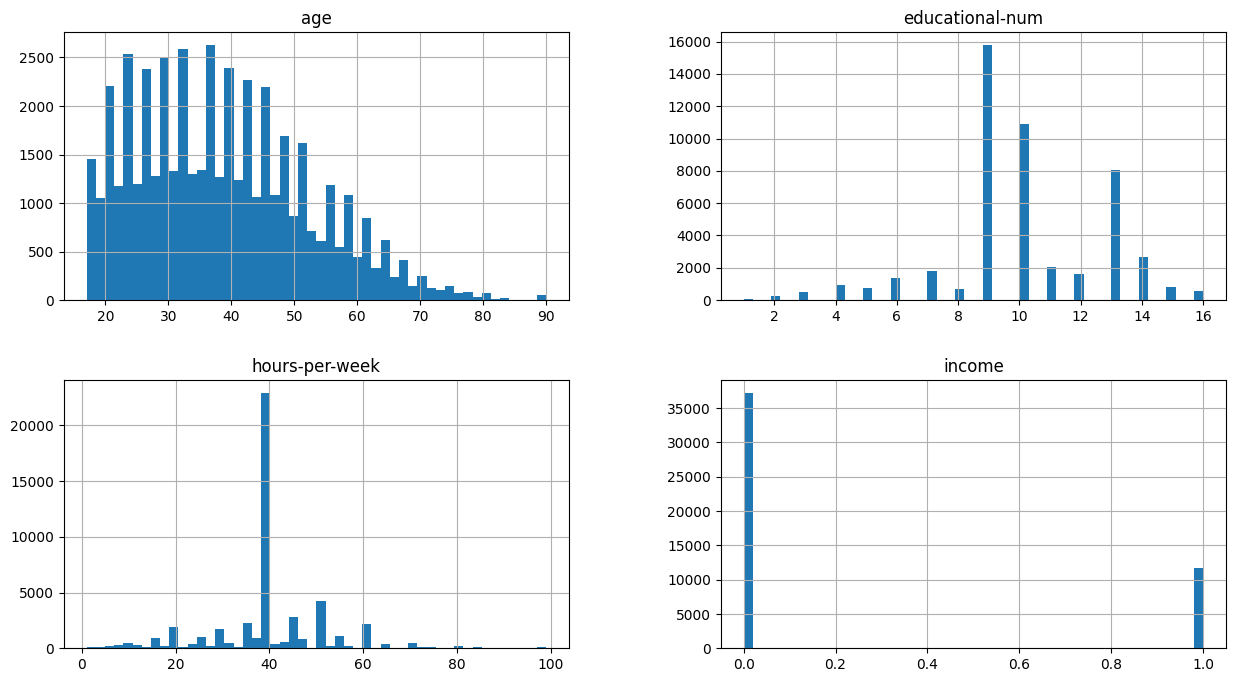

In [10]:
df.hist(figsize=(15, 8),bins = 50)
plt.show()

<Figure size 500x200 with 0 Axes>

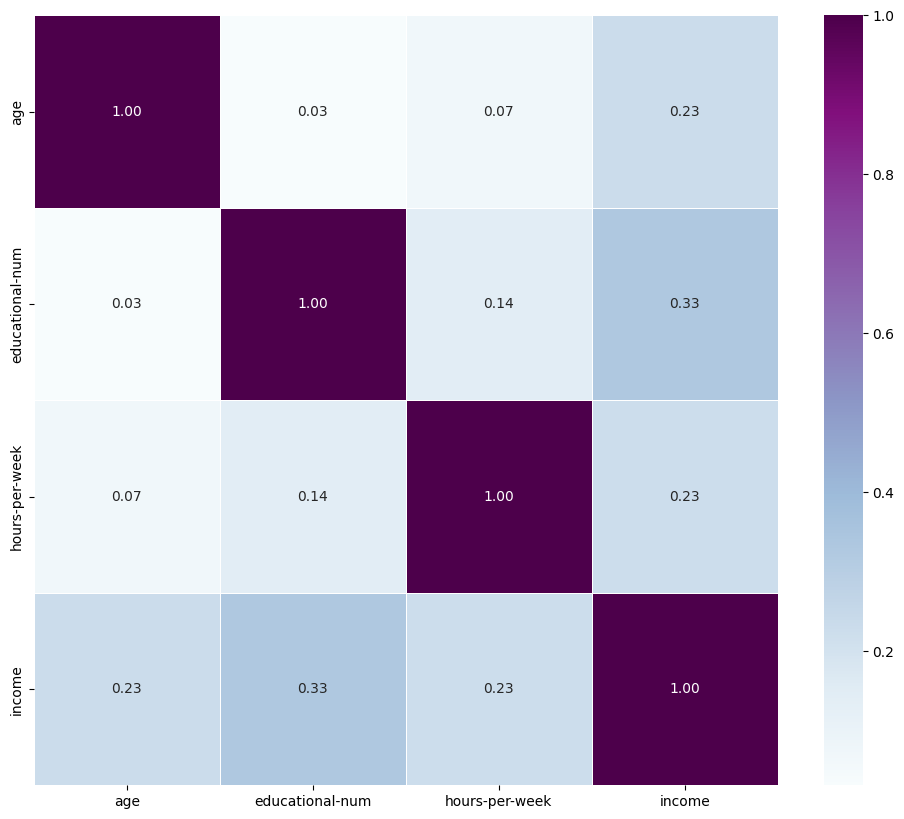

In [11]:
plt.figure(figsize=(5, 2))
numeric_columns = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='BuPu', fmt=".2f", linewidths=.5)
plt.show()

<div style="text-align:center; background-color:#add8e6; padding:20px; border-radius:25px;">
  <h1 style="font-size:36px; color:#FFFFFF;"><b>💡The best features for our Model is (workclass, educational-num, marital-status, occupation, gender, hours-per-week)💡</b></h1>
</div>

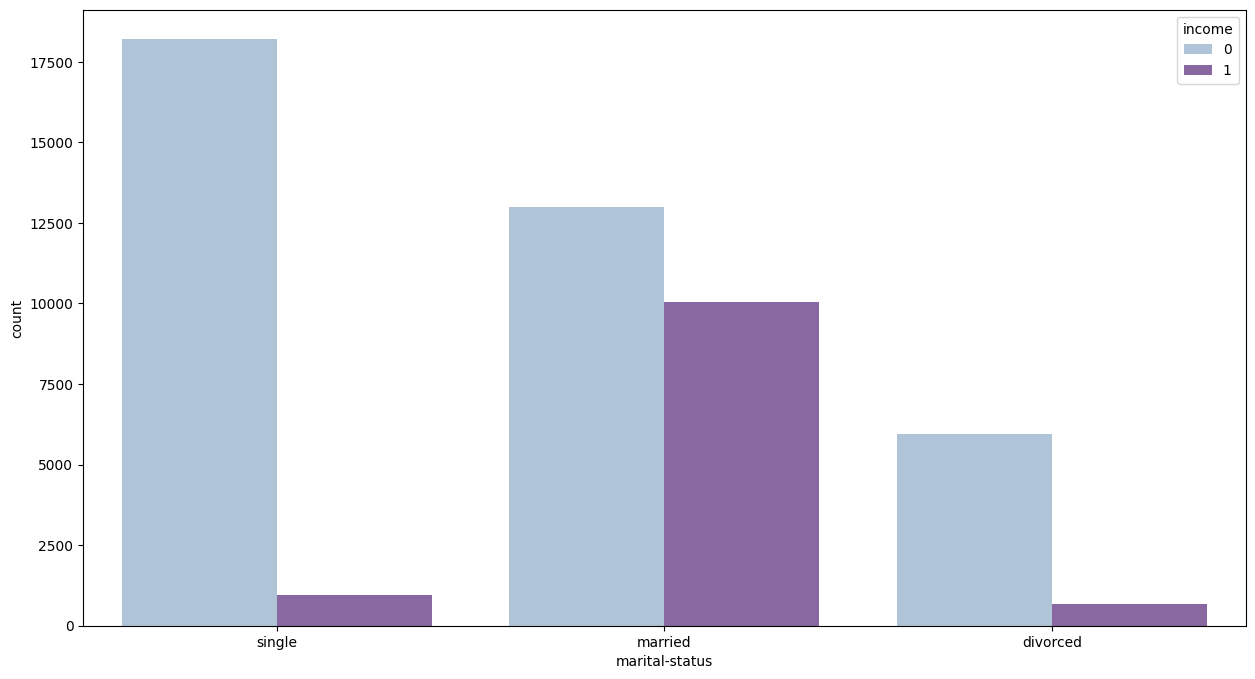

In [12]:
plt.figure(figsize=(15, 8))
sns.countplot(data=df, x='marital-status', hue='income', palette="BuPu")
plt.show()

<div style="text-align:center; background-color:#6A0DAD; padding:20px; border-radius:25px;">
  <h1 style="font-size:36px; color:#FFFFFF;"><b>3.Feature Scaling & Handling Outliers</b></h1>
</div>

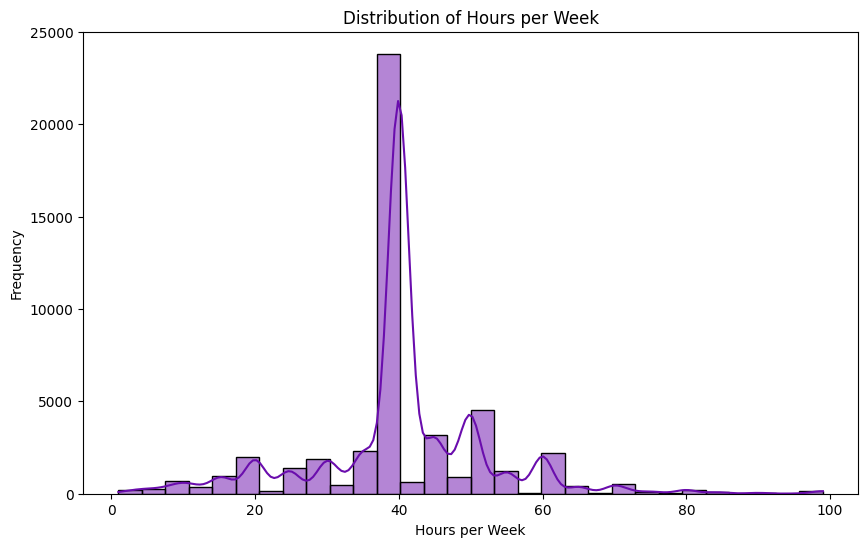

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(df['hours-per-week'], kde=True, bins=30, color='#6A0DAD')
plt.title('Distribution of Hours per Week')
plt.xlabel('Hours per Week')
plt.ylabel('Frequency')
plt.show()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48842 entries, 0 to 48806
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   education        48842 non-null  object
 3   educational-num  48842 non-null  int64 
 4   marital-status   48842 non-null  object
 5   occupation       48842 non-null  object
 6   relationship     48842 non-null  object
 7   race             48842 non-null  object
 8   gender           48842 non-null  object
 9   hours-per-week   48842 non-null  int64 
 10  native-country   48842 non-null  object
 11  income           48842 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 4.8+ MB


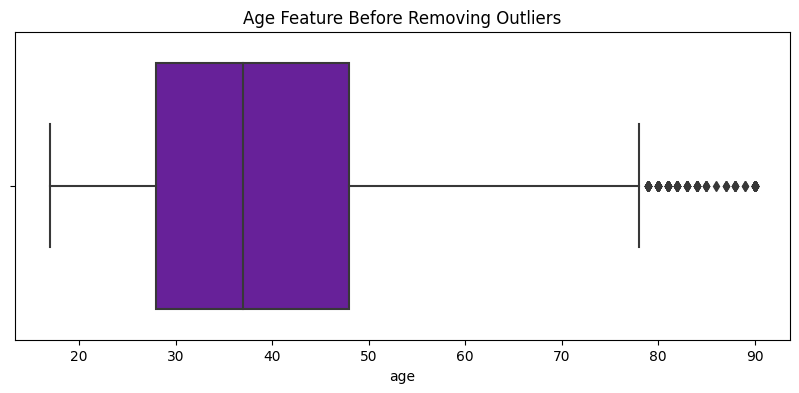

In [15]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['age'], color = '#6A0DAD')
plt.title('Age Feature Before Removing Outliers')
plt.show()

In [16]:
#Remove the Outliers
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['age'] < Q1 - 1.5 * IQR) | (df['age'] > Q3 + 1.5 * IQR)]

df.drop(outliers.index, inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48626 entries, 0 to 46650
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48626 non-null  int64 
 1   workclass        48626 non-null  object
 2   education        48626 non-null  object
 3   educational-num  48626 non-null  int64 
 4   marital-status   48626 non-null  object
 5   occupation       48626 non-null  object
 6   relationship     48626 non-null  object
 7   race             48626 non-null  object
 8   gender           48626 non-null  object
 9   hours-per-week   48626 non-null  int64 
 10  native-country   48626 non-null  object
 11  income           48626 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 4.8+ MB


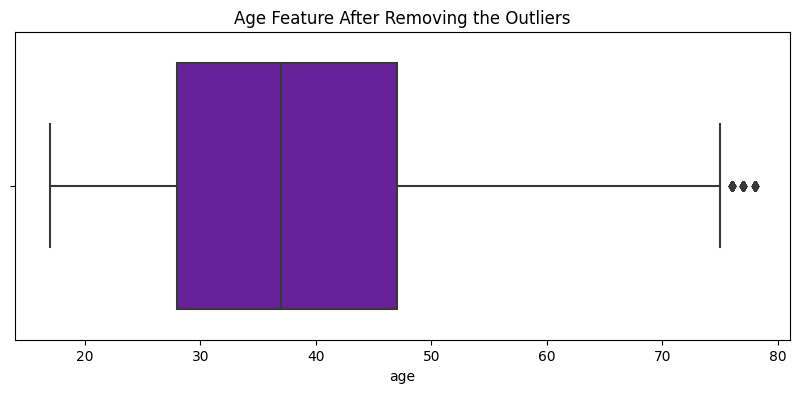

In [18]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['age'],color = '#6A0DAD')
plt.title('Age Feature After Removing the Outliers')
plt.show()

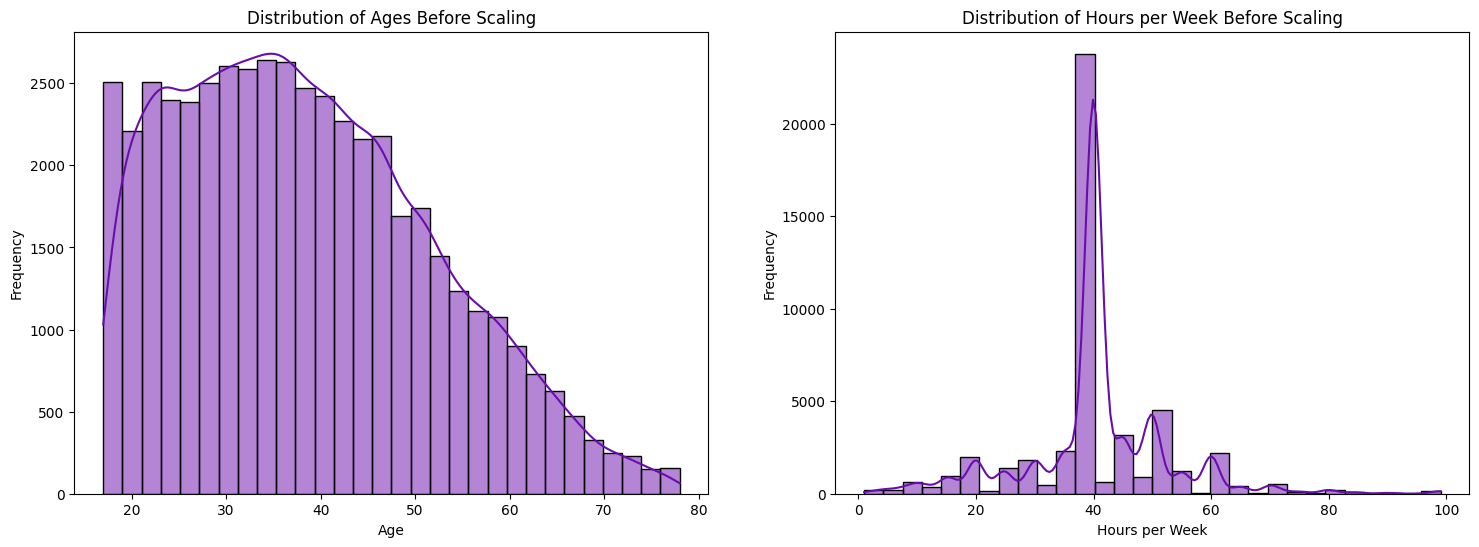

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Distribution plot for 'age'
sns.histplot(df['age'], kde=True, bins=30, color = '#6A0DAD', ax=axes[0])
axes[0].set_title('Distribution of Ages Before Scaling')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

# Distribution plot for 'hours-per-week'
sns.histplot(df['hours-per-week'], kde=True, bins=30, color = '#6A0DAD', ax=axes[1])
axes[1].set_title('Distribution of Hours per Week Before Scaling')
axes[1].set_xlabel('Hours per Week')
axes[1].set_ylabel('Frequency')

plt.show()

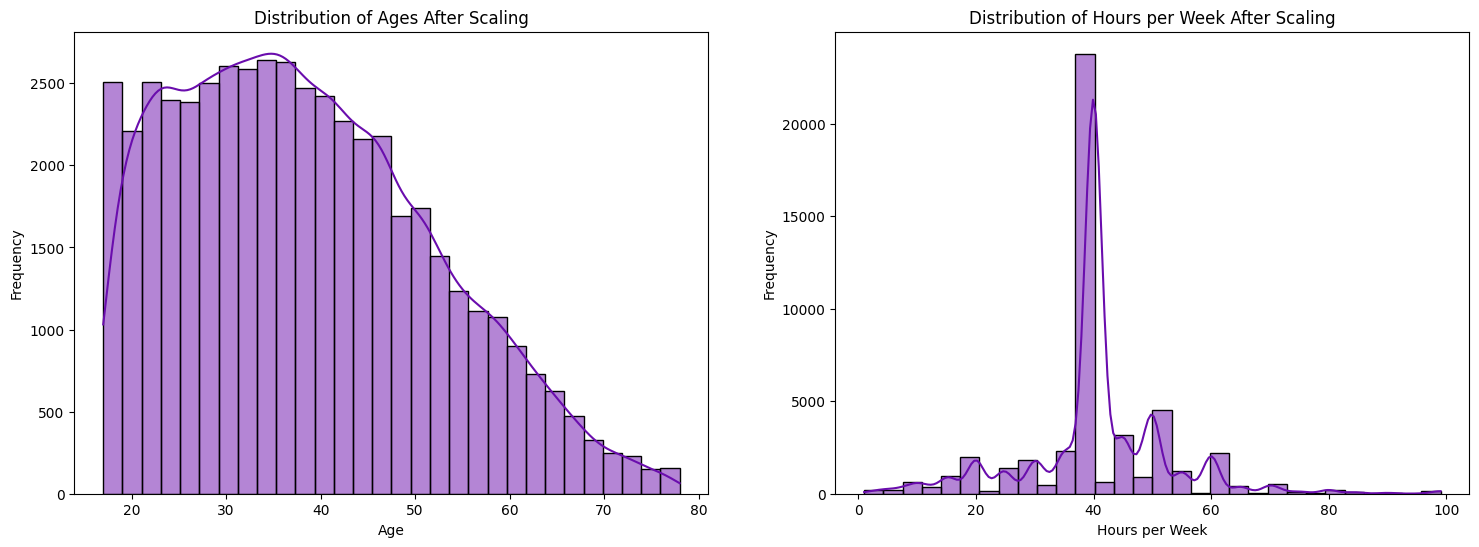

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Distribution plot for 'age'
sns.histplot(df['age'], kde=True, bins=30, color = '#6A0DAD', ax=axes[0])
axes[0].set_title('Distribution of Ages After Scaling')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

# Distribution plot for 'hours-per-week'
sns.histplot(df['hours-per-week'], kde=True, bins=30, color = '#6A0DAD', ax=axes[1])
axes[1].set_title('Distribution of Hours per Week After Scaling')
axes[1].set_xlabel('Hours per Week')
axes[1].set_ylabel('Frequency')

plt.show()

<div style="text-align:center; background-color:#6A0DAD; padding:20px; border-radius:25px;">
  <h1 style="font-size:36px; color:#FFFFFF;"><b>4.Model Selection</b></h1>
</div>

In [21]:
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})

In [22]:
df.drop(['age', 'hours-per-week'], axis=1, inplace=True)
df

,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,native-country,income
0,Private,11th,7,single,Machine-op-inspct,Own-child,Black,1,United-States,0
1,Private,HS-grad,9,married,Farming-fishing,Husband,White,1,United-States,0
2,Local-gov,Assoc-acdm,12,married,Protective-serv,Husband,White,1,United-States,1
3,Private,Some-college,10,married,Machine-op-inspct,Husband,Black,1,United-States,1
5,Private,10th,6,single,Other-service,Not-in-family,White,1,United-States,0
...,...,...,...,...,...,...,...,...,...,...
42577,Self-emp-not-inc,7th-8th,4,single,Other-service,Not-in-family,White,0,United-States,0
42644,Private,Some-college,10,married,Craft-repair,Husband,White,1,United-States,1
44475,Private,Bachelors,13,married,Prof-specialty,Not-in-family,White,1,United-States,0
44969,Private,Some-college,10,single,Adm-clerical,Own-child,White,0,United-States,0


In [23]:
df.reset_index(inplace=True)

In [24]:
df.columns

Index(['index', 'workclass', 'education', 'educational-num', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'native-country',
       'income'],
      dtype='object')

In [25]:
columns_to_keep = ['workclass', 'educational-num', 'marital-status', 'occupation', 'gender', 'native-country', 'income']
Features = df[columns_to_keep]

In [34]:
X= Features

X = pd.get_dummies(X, columns=['workclass', 'marital-status', 'occupation', 'native-country'])

X = X.drop(columns=['income'])
y = df['income']

x_train, x_test, y_train, y_test = train_test_split(X , y, test_size = 0.3)

In [35]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [36]:
print('the shape of the x train data is ' + str(x_train.shape))
print('the shape of the x test data is ' + str(y_test.shape))

the shape of the x train data is (34038, 68)
the shape of the x test data is (14588,)


In [37]:
Features

,workclass,educational-num,marital-status,occupation,gender,native-country,income
0,Private,7,single,Machine-op-inspct,1,United-States,0
1,Private,9,married,Farming-fishing,1,United-States,0
2,Local-gov,12,married,Protective-serv,1,United-States,1
3,Private,10,married,Machine-op-inspct,1,United-States,1
4,Private,6,single,Other-service,1,United-States,0
...,...,...,...,...,...,...,...
48621,Self-emp-not-inc,4,single,Other-service,0,United-States,0
48622,Private,10,married,Craft-repair,1,United-States,1
48623,Private,13,married,Prof-specialty,1,United-States,0
48624,Private,10,single,Adm-clerical,0,United-States,0


In [38]:
model = LogisticRegression(penalty='l2')
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [39]:
print('model score is: ' + str(round(model.score(X_test_scaled, y_test)* 100, 0)) + '%')

model score is: 83.0%


In [40]:
elastic_net_model = LogisticRegression(penalty='elasticnet', l1_ratio=1.0, solver='saga')
elastic_net_model.fit(X_train_scaled, y_train)

LogisticRegression(l1_ratio=1.0, penalty='elasticnet', solver='saga')

In [41]:
print('model score is: ' + str(round(elastic_net_model.score(X_test_scaled, y_test)* 100, 0)) + '%')

model score is: 83.0%
